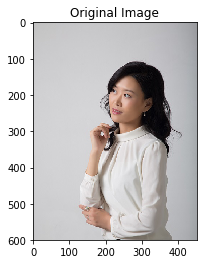

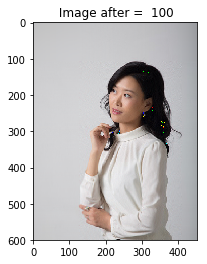

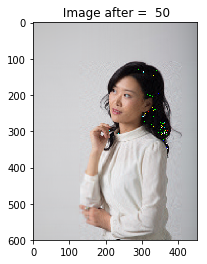

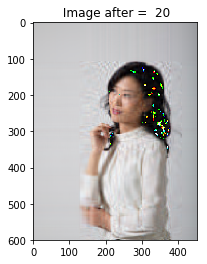

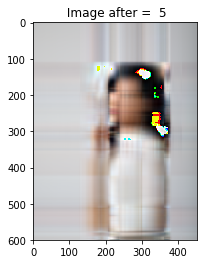

In [2]:
import os
import threading

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys

def svdImageMatrix(om, k):
    U, S, Vt = np.linalg.svd(om)
    cmping = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])    
    return cmping

def compressImage(image, k):
    redChannel = image[..., 0]
    greenChannel = image[..., 1]
    blueChannel = image[..., 2]

    cmpRed = svdImageMatrix(redChannel, k)
    cmpGreen = svdImageMatrix(greenChannel, k)
    cmpBlue = svdImageMatrix(blueChannel, k)

    newImage = np.zeros((image.shape[0], image.shape[1], 3), 'uint8')

    newImage[..., 0] = cmpRed
    newImage[..., 1] = cmpGreen
    newImage[..., 2] = cmpBlue

    return newImage

path = 'liye.jpg'
img = mpimg.imread(path)

title = "Original Image"
plt.title(title)
plt.imshow(img)
plt.show()

weights = [100, 50, 20, 5]

for k in weights:
    newImg = compressImage(img, k)

    title = " Image after =  %s" %k
    plt.title(title)
    plt.imshow(newImg)
    plt.show()    

    newname = os.path.splitext(path)[0] + '_comp_' + str(k) + '.jpg'
    mpimg.imsave(newname, newImg)